In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df = pd.read_csv('/kaggle/input/galacticcoordswithgaia/gaiaDataNearSun.csv')
df.head()

,parallax,l,b
0,-0.065571,335.177577,-4.013744
1,-0.027793,335.196348,-3.959210
2,-1.068841,334.547370,-3.207017
3,-0.025257,335.221879,-3.858439
4,-0.311465,335.495708,-3.718143


In [3]:
df_filtered = df[df['parallax'] >= 0]
df_filtered.head()

,parallax,l,b
8,4.361050,102.540726,22.150772
14,3.848747,101.339751,25.568407
18,4.481269,105.135384,14.431055
19,5.357165,333.502588,-14.510419
21,3.647845,102.827615,26.384531


In [4]:
convDEG2RAD = 3.141592/180.0

In [5]:
df_filtered['distance'] = 1.0/df_filtered.parallax

/tmp/ipykernel_20/3582724965.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['distance'] = 1.0/df_filtered.parallax


In [6]:
X = df_filtered.distance * np.cos(df_filtered.b*convDEG2RAD) * np.cos(df_filtered.l*convDEG2RAD) - 8.00 #-8 kpc accounts for Sun's distance from Galactic Center (roughly)
Y = df_filtered.distance * np.cos(df_filtered.b*convDEG2RAD) * np.sin(df_filtered.l*convDEG2RAD)
Z = df_filtered.distance * np.sin(df_filtered.b*convDEG2RAD)

In [7]:
import plotly.express as px

center_l = df_filtered['l'].median()
center_b = df_filtered['b'].median()

# df_filtered = df_filtered[(df_filtered['l'] != center_l) | (df_filtered['b'] != center_b)]

new_data = pd.DataFrame({'l': [-8.00], 'b': [0]})
df_filtered = pd.concat([df_filtered, new_data], ignore_index=True)

fig = px.scatter(df_filtered, x=X, y=Y, title="Scatter plot of stars with added point", height=1000, width=1000)

fig.add_scatter(x=[-8.00], y=[0], mode='markers', marker=dict(size=10, color='red', symbol='cross'))

fig.show()

In [8]:
fig_3d = px.scatter_3d(df_filtered, x='l', y='b', z='parallax', title="3D Scatter plot of stars with added point", height=1000, width=1000)
fig_3d.add_scatter3d(x=[-8.00], y=[0], z=[0], mode='markers', marker=dict(size=10, color='red', symbol='cross'))
fig_3d.show()

In [9]:
import plotly.express as px

center_l = df_filtered['l'].median()
center_b = df_filtered['b'].median()

# df_filtered = df_filtered[(df_filtered['l'] != center_l) | (df_filtered['b'] != center_b)]

new_data = pd.DataFrame({'l': [0], 'b': [0]})
df_filtered = pd.concat([df_filtered, new_data], ignore_index=True)

fig = px.scatter(df_filtered, x=X, y=Z, title="Scatter plot of stars with added point", height=1000, width=1000)

fig.add_scatter(x=[0], y=[0], mode='markers', marker=dict(size=10, color='red', symbol='cross'))

fig.show()

In [10]:
import numpy as np

df_filtered['r'] = np.sqrt(df_filtered['l']**2 + df_filtered['b']**2)
df_filtered['theta'] = np.arctan2(df_filtered['b'], df_filtered['l'])

df_filtered[['r', 'theta', 'parallax']].head()

,r,theta,parallax
0,104.905944,0.212750,4.361050
1,104.515495,0.247146,3.848747
2,106.121177,0.136409,4.481269
3,333.818107,-0.043482,5.357165
4,106.158664,0.251171,3.647845


In [11]:
df_filtered = pd.concat([df_filtered, new_data], ignore_index=True)

fig = px.scatter(df_filtered, x=df_filtered['r'], y=df_filtered['theta'], title="Scatter plot of stars with added point", height=1000, width=1000)

fig.show()

In [12]:
fig_3d = px.scatter_3d(df_filtered, x=df_filtered['r'], y=df_filtered['theta'], z=df_filtered['parallax'], title="3D Scatter plot of stars with added point", height=1000, width=1000)

fig_3d.show()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

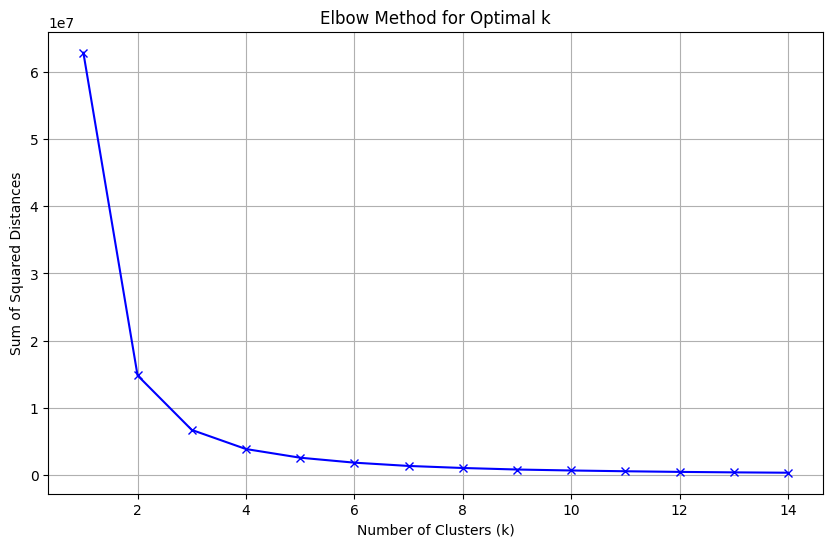

In [13]:
from sklearn.cluster import KMeans

data_to_cluster = df_filtered[['r', 'theta', 'parallax']]
data_to_cluster = data_to_cluster.dropna()

K = range(1, 15)
sum_of_squared_distances = []
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_to_cluster)
    sum_of_squared_distances.append(km.inertia_)

# Plot the elbow curve again
plt.figure(figsize=(10, 6))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [14]:
data_to_cluster['distance'] = 1.0/data_to_cluster.parallax

In [15]:
data_to_cluster = data_to_cluster.dropna()

k_optimal = 4
kmeans = KMeans(n_clusters=k_optimal)
data_to_cluster['cluster'] = kmeans.fit_predict(data_to_cluster)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [16]:
fig_3d_clustered = px.scatter_3d(data_to_cluster, x='r', y='theta', z='parallax', color='cluster', title="3D Scatter plot of stars clustered with K-means", height=1000, width=1000)

fig_3d_clustered.show()